# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [246]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [230]:
# откройте данные: ваш код здесь
df = pd.read_csv(
    "data/spam_or_not_spam.csv", sep=',')

df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [231]:
# рассчитайте частоты для классов : ваш код здесь
display(df.info())
#display(df.shape)
display(df.groupby('label')['label'].count())

display(df['label'].value_counts(normalize=True) * 100)

#display(df[df['label'] == 1].count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


None

label
0    2500
1     500
Name: label, dtype: int64

label
0    83.333333
1    16.666667
Name: proportion, dtype: float64

['not spam' 'spam']


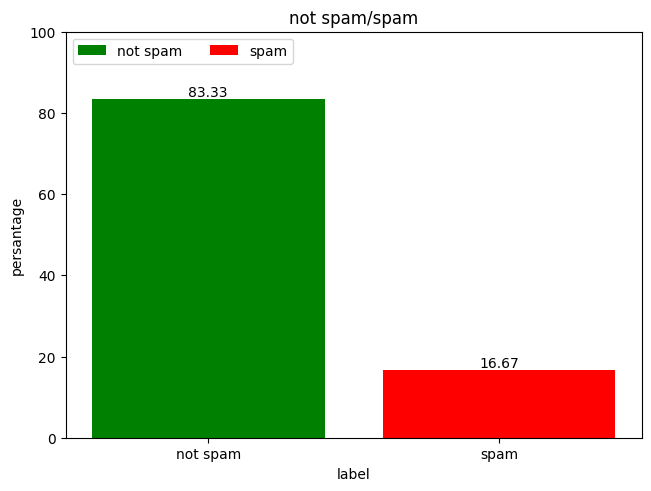

In [232]:
# визуализируйте результат: ваш код здесь

fig, ax = plt.subplots(layout='constrained')
labels = df['label'].apply(lambda x: 'spam' if x else 'not spam').unique()
print(labels)

bar_container = ax.bar(labels, df['label'].value_counts(normalize=True)*100, label=labels, color=['green', 'red'])
ax.set(ylabel='persantage', xlabel="label",  title='not spam/spam', ylim=(0, 100))
ax.bar_label(bar_container, fmt='{:,.2f}')
ax.legend(loc='upper left', ncols=3)
plt.show()

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [233]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [234]:
#ваш код здесь
display(df.isnull().sum())
df["email"] = df["email"].str.replace(r"\W+", " ", regex=True).str.lower()
df['email'] = df['email'].str.replace('\s+', ' ', regex=True).str.strip()
df = df.replace('', np.nan)
df = df.dropna()

display(df[df['email'] == ''])

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ciber\AppData\Local\Temp\ipykernel_31996\4061115850.py:4: SyntaxWarning: invalid escape sequence '\s'
  df['email'] = df['email'].str.replace('\s+', ' ', regex=True).str.strip()


email    1
label    0
dtype: int64

,email,label


In [235]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2997 non-null   object
 1   label   2997 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.2+ KB


None

Переводим данные в векторный вид:

In [237]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [243]:
#ваш код здесь
display(X.shape)


(2997, 34116)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [244]:
#ваш код здесь
y = df["label"]

print(X.shape, y.shape)

(2997, 34116) (2997,)


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [317]:
#ваш код здесь
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics #метрики

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [318]:
#ваш код здесь
display(round(y_test.mean(), 3))

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [352]:
#ваш код здесь
#clf = MultinomialNB(alpha=0.01)
clf = ComplementNB(alpha=0.01)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)



Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [350]:
#ваш код здесь
#print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(metrics.classification_report(y_test, y_test_pred, digits=3))



              precision    recall  f1-score   support

           0      0.995     0.998     0.997       626
           1      0.992     0.976     0.984       124

    accuracy                          0.995       750
   macro avg      0.994     0.987     0.990       750
weighted avg      0.995     0.995     0.995       750



Нарисуйте ROC-кривую:

,0,1
0,626,0
1,9,115


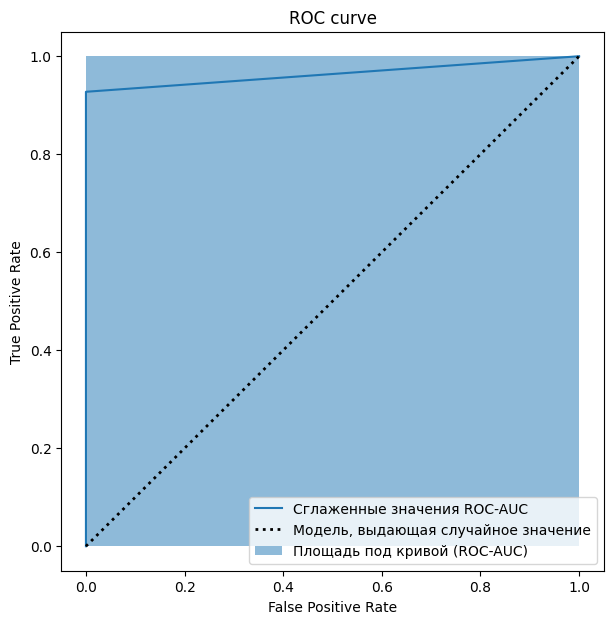

In [321]:
#ваш код здесь

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

display(pd.DataFrame(confusion_matrix(y_test, y_test_pred)))
#display(y_test_pred)

false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, y_test_pred)


# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, 
         label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', 
         label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="pre", 
                 alpha=0.5, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()



In [322]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_test_pred).round(3)
print("ROC-AUC на тестовой выборке:", roc_auc_score(y_test, y_test_pred).round(3)) 



ROC-AUC на тестовой выборке: 0.964


## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [378]:
#ваш код здесь
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
              {'alpha': list(np.linspace(0.01, 1, 100, dtype=float))}, # уровень альфа
              
]

random_search = RandomizedSearchCV(
    estimator=ComplementNB(),
    param_distributions=param_grid,
    cv=5, 
    n_iter=10,
    n_jobs=-1,
    random_state=42
)

%time random_search.fit(X_train, y_train)
y_test_pred = random_search.predict(X_test)

print("accuracy на train наборе: {:.3f}".format(random_search.score(X_train, y_train)))
print("accuracy на тестовом наборе: {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))
print("Наилучшие значения параметров: {}".format(random_search.best_params_))


CPU times: total: 375 ms
Wall time: 7.76 s
accuracy на train наборе: 0.999
accuracy на тестовом наборе: 0.995
Наилучшие значения параметров: {'alpha': 0.4}


In [375]:
import optuna

print("Версия Optuna: {}".format(optuna.__version__))


def optuna_CNB(trial):
  # задаем пространства поиска гиперпараметров
  alpha = trial.suggest_float('alpha',  0.1, 1, step=0.1)

  # создаем модель
  model = ComplementNB(
    alpha=alpha
)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.accuracy_score(y_train, model.predict(X_train))

  return score


%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study_CNB = optuna.create_study(study_name="ComplementNB", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study_CNB.optimize(optuna_CNB, n_trials=20)


[I 2023-10-10 00:33:41,118] A new study created in memory with name: ComplementNB
[I 2023-10-10 00:33:41,140] Trial 0 finished with value: 0.9982198486871384 and parameters: {'alpha': 0.7000000000000001}. Best is trial 0 with value: 0.9982198486871384.
[I 2023-10-10 00:33:41,160] Trial 1 finished with value: 0.9982198486871384 and parameters: {'alpha': 0.7000000000000001}. Best is trial 0 with value: 0.9982198486871384.
[I 2023-10-10 00:33:41,188] Trial 2 finished with value: 0.9991099243435692 and parameters: {'alpha': 0.2}. Best is trial 2 with value: 0.9991099243435692.
[I 2023-10-10 00:33:41,209] Trial 3 finished with value: 0.9991099243435692 and parameters: {'alpha': 0.30000000000000004}. Best is trial 2 with value: 0.9991099243435692.
[I 2023-10-10 00:33:41,227] Trial 4 finished with value: 0.9982198486871384 and parameters: {'alpha': 0.7000000000000001}. Best is trial 2 with value: 0.9991099243435692.
[I 2023-10-10 00:33:41,247] Trial 5 finished with value: 0.9986648865153538 a

Версия Optuna: 3.3.0
CPU times: total: 0 ns
Wall time: 0 ns


[I 2023-10-10 00:33:41,317] Trial 8 finished with value: 0.9986648865153538 and parameters: {'alpha': 0.4}. Best is trial 2 with value: 0.9991099243435692.
[I 2023-10-10 00:33:41,336] Trial 9 finished with value: 0.9991099243435692 and parameters: {'alpha': 0.30000000000000004}. Best is trial 2 with value: 0.9991099243435692.
[I 2023-10-10 00:33:41,370] Trial 10 finished with value: 0.9991099243435692 and parameters: {'alpha': 0.1}. Best is trial 2 with value: 0.9991099243435692.
[I 2023-10-10 00:33:41,414] Trial 11 finished with value: 0.9991099243435692 and parameters: {'alpha': 0.1}. Best is trial 2 with value: 0.9991099243435692.
[I 2023-10-10 00:33:41,449] Trial 12 finished with value: 0.9991099243435692 and parameters: {'alpha': 0.30000000000000004}. Best is trial 2 with value: 0.9991099243435692.
[I 2023-10-10 00:33:41,488] Trial 13 finished with value: 0.9973297730307076 and parameters: {'alpha': 1.0}. Best is trial 2 with value: 0.9991099243435692.
[I 2023-10-10 00:33:41,540] 

In [387]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study_CNB.best_params))
print("accuracyна обучающем наборе: {:.4f}".format(study_CNB.best_value))

# рассчитаем точность для тестовой выборки
model = ComplementNB(**study_CNB.best_params)
model.fit(X_train, y_train)
print("accuracy на train наборе: {:.4f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print("accuracy на тестовом наборе: {:.4f}".format(metrics.accuracy_score(y_test, y_test_pred)))




Наилучшие значения гиперпараметров {'alpha': 0.2}
accuracyна обучающем наборе: 0.9991
accuracy на train наборе: 0.9947
accuracy на тестовом наборе: 0.9947
